# 訓練一個正確率90%的神經網路

## 讀入基本套件

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
#讀入data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#檢查data
len(x_train)
len(x_test)

10000

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

調整輸出格式

In [6]:
from keras.utils import np_utils

In [7]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 先用上課的參數跑一個成果不是太好的的神經網絡，當作改善標準(model_0)

- 使用 2 個 hidden layers
- Hidden layer 1 用 4 個神經元
- Hidden layer 2 用 2 個神經元
- Activation Function 唯一指名 sigmoid
- loss function 用 mse
- optimizer 用標準的 SGD
- learning rate 設0.087
- batch_size = 100
- epochs = 20

In [8]:
model_0 = Sequential()
model_0.add(Dense(4, input_dim = 784))
model_0.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model_0.add(Dense(2))
model_0.add(Activation('sigmoid'))

In [10]:
model_0.add(Dense(10))
model_0.add(Activation('softmax'))

In [11]:
model_0.compile(loss='mse', optimizer = SGD(lr = 0.087), metrics=['accuracy'])

In [12]:
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_0_20 = model_0.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0901 - acc: 0.1050 - val_loss: 0.0899 - val_acc: 0.1442
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0898 - acc: 0.1419 - val_loss: 0.0897 - val_acc: 0.1482
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0896 - acc: 0.1608 - val_loss: 0.0895 - val_acc: 0.1661
Epoch 4/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0894 - acc: 0.1666 - val_loss: 0.0893 - val_acc: 0.1722
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0892 - acc: 0.1717 - val_loss: 0.0892 - val_acc: 0.1755
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0891 - acc: 0.1746 - val_loss: 0.0890 - val_acc: 0.1792
Epoch 7/20
60000/60000 [==============================] - 1s 14us/step - loss: 0

In [14]:
score = model_0.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 17us/step
loss: 0.08679383916854859
正確率 0.1851


多訓練幾次看會不會變好(重複執行下列程式碼)

In [57]:
model_0.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0641 - acc: 0.4618 - val_loss: 0.0645 - val_acc: 0.4601
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0642 - acc: 0.4609 - val_loss: 0.0647 - val_acc: 0.4541
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0641 - acc: 0.4625 - val_loss: 0.0642 - val_acc: 0.4569
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0640 - acc: 0.4584 - val_loss: 0.0642 - val_acc: 0.4564
Epoch 5/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0641 - acc: 0.4585 - val_loss: 0.0644 - val_acc: 0.4513
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0641 - acc: 0.4610 - val_loss: 0.0642 - val_acc: 0.4570
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0638 - acc: 0.4620 - val_loss: 0.0641 - val_acc

In [58]:
score = model_0.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 21us/step
loss: 0.06364026155471801
正確率 0.4619


### 小結：連續跑幾次後，正確率達到45%

## 測試1：調高神經元數(model_1)

- 使用 2 個 hidden layers
- Hidden layer 1 用 50 個神經元
- Hidden layer 2 用 50 個神經元
- Activation Function 用 sigmoid
- 最後的輸出Activation Function 用 softmax
- loss function 用 mse
- optimizer 用標準的 SGD
- learning rate 設0.087
- batch_size = 100
- epochs = 20

In [17]:
model_1 = Sequential()

In [18]:
model_1.add(Dense(50, input_dim = 784))
model_1.add(Activation('sigmoid'))

In [19]:
model_1.add(Dense(50))
model_1.add(Activation('sigmoid'))

In [20]:
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [21]:
model_1.compile(loss='mse', optimizer = SGD(lr = 0.087), metrics=['accuracy'])

In [22]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_5 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_1_20 = model_1.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0896 - acc: 0.2280 - val_loss: 0.0872 - val_acc: 0.3230
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0855 - acc: 0.3860 - val_loss: 0.0838 - val_acc: 0.5010
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0823 - acc: 0.5153 - val_loss: 0.0805 - val_acc: 0.5243
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0786 - acc: 0.5207 - val_loss: 0.0764 - val_acc: 0.5315
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0741 - acc: 0.5311 - val_loss: 0.0716 - val_acc: 0.5430
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0689 - acc: 0.5560 - val_loss: 0.0662 - val_acc: 0.5829
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0636 - acc: 0.6067 - val_loss: 0.0608 - val_acc

In [24]:
score = model_1.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 30us/step
loss: 0.022710071156919004
正確率 0.8908


#### 看起來很讚，正確率穩定上升，多訓練幾次(重複執行下列程式碼)

In [61]:
model_1.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0098 - acc: 0.9423 - val_loss: 0.0108 - val_acc: 0.9316
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0098 - acc: 0.9421 - val_loss: 0.0109 - val_acc: 0.9326
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0097 - acc: 0.9432 - val_loss: 0.0109 - val_acc: 0.9321
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0097 - acc: 0.9434 - val_loss: 0.0109 - val_acc: 0.9302
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0096 - acc: 0.9442 - val_loss: 0.0108 - val_acc: 0.9309
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0095 - acc: 0.9446 - val_loss: 0.0107 - val_acc: 0.9320
Epoch 7/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0094 - acc: 0.9446 - val_loss: 0.0106 - val_acc

In [62]:
score = model_1.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 24us/step
loss: 0.010059133320953697
正確率 0.9356


### 測試1結論：把神經元調多，重複訓練幾次後，正確率就穩定破90%了!!成功達標!!最後為94%

## 測試2：多設幾個hidden layer(model_2)

- 使用 10 個 hidden layers (參考model_1總共也是用100個神經元，平均分到10層)
- Hidden layer 1 用 10 個神經元
- Hidden layer 2 用 10 個神經元
- Hidden layer 3 用 10 個神經元
- Hidden layer 4 用 10 個神經元
- Hidden layer 5 用 10 個神經元
- Hidden layer 6 用 10 個神經元
- Hidden layer 7 用 10 個神經元
- Hidden layer 8 用 10 個神經元
- Hidden layer 9 用 10 個神經元
- Hidden layer 10 用 10 個神經元
- Activation Function 用 sigmoid
- 最後的輸出Activation Function 用 softmax
- loss function 用 mse
- optimizer 用標準的 SGD
- learning rate 設0.087
- batch_size = 100
- epochs = 20

In [27]:
model_2 = Sequential()
model_2.add(Dense(10, input_dim = 784))
model_2.add(Activation('sigmoid'))

In [28]:
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

In [29]:
model_2.compile(loss='mse', optimizer = SGD(lr = 0.087), metrics=['accuracy'])

In [30]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
__________

In [31]:
model_2_20 = model_2.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0920 - acc: 0.0903 - val_loss: 0.0914 - val_acc: 0.0892
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0911 - acc: 0.0970 - val_loss: 0.0908 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0907 - acc: 0.1124 - val_loss: 0.0905 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0904 - acc: 0.1124 - val_loss: 0.0903 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0903 - acc: 0.1124 - val_loss: 0.0902 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0902 - acc: 0.1124 - val_loss: 0.0901 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0901 - acc: 0.1124 - val_loss: 0.0901 - val_acc

In [32]:
score = model_2.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 16us/step
loss: 0.08996859245300293
正確率 0.1135


### 測試2小結：調多層數後，正確率為11%，不但沒有上升，跑的時間還變長，失敗。

## 測試3：把神經元集中在某一層

### 先集中在第一層(model_3)
- 使用 2 個 hidden layers (參考model_1，把神經元都集中在第一層)
- Hidden layer 1 用 90 個神經元
- Hidden layer 2 用 10 個神經元
- Activation Function 用 sigmoid
- 最後的輸出Activation Function 用 softmax
- loss function 用 mse
- optimizer 用標準的 SGD
- learning rate 設0.087
- batch_size = 100
- epochs = 20

In [33]:
model_3 = Sequential()
model_3.add(Dense(90, input_dim = 784))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(10))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

In [34]:
model_3.compile(loss='mse', optimizer = SGD(lr = 0.087), metrics=['accuracy'])

In [35]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 90)                70650     
_________________________________________________________________
activation_18 (Activation)   (None, 90)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                910       
_________________________________________________________________
activation_19 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
Total params: 71,670
Trainable params: 71,670
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_3_20 = model_3.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0900 - acc: 0.1324 - val_loss: 0.0888 - val_acc: 0.2140
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0879 - acc: 0.2745 - val_loss: 0.0868 - val_acc: 0.2966
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0857 - acc: 0.2937 - val_loss: 0.0844 - val_acc: 0.2904
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0832 - acc: 0.2794 - val_loss: 0.0817 - val_acc: 0.2825
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0805 - acc: 0.2887 - val_loss: 0.0789 - val_acc: 0.3135
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0777 - acc: 0.3274 - val_loss: 0.0761 - val_acc: 0.3615
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0750 - acc: 0.3819 - val_loss: 0.0735 - val_acc

In [37]:
score = model_3.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 18us/step
loss: 0.04411541872024536
正確率 0.7676


#### 看起來很讚，多訓練幾次達穩定(重複執行下列的程式碼)

In [68]:
model_3.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0075 - acc: 0.9596 - val_loss: 0.0098 - val_acc: 0.9396
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0075 - acc: 0.9596 - val_loss: 0.0098 - val_acc: 0.9388
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0075 - acc: 0.9594 - val_loss: 0.0099 - val_acc: 0.9387
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0075 - acc: 0.9594 - val_loss: 0.0098 - val_acc: 0.9387
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0073 - acc: 0.9599 - val_loss: 0.0098 - val_acc: 0.9374
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0072 - acc: 0.9609 - val_loss: 0.0098 - val_acc: 0.9384
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0072 - acc: 0.9608 - val_loss: 0.0097 - val_acc

In [69]:
score = model_3.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 25us/step
loss: 0.009209773046523333
正確率 0.9423


多訓練幾次就破90%啦~

### 把神經元集中在第二層(model_4)
- 使用 2 個 hidden layers (參考model_1，把神經元都集中在第二層)
- Hidden layer 1 用 10 個神經元
- Hidden layer 2 用 90 個神經元
- Activation Function 用 sigmoid
- 最後的輸出Activation Function 用 softmax
- loss function 用 mse
- optimizer 用標準的 SGD
- learning rate 設0.087
- batch_size = 100
- epochs = 20

In [40]:
model_4 = Sequential()
model_4.add(Dense(10, input_dim = 784))
model_4.add(Activation('sigmoid'))
model_4.add(Dense(90))
model_4.add(Activation('sigmoid'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

In [41]:
model_4.compile(loss='mse', optimizer = SGD(lr = 0.087), metrics=['accuracy'])

In [42]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 90)                990       
_________________________________________________________________
activation_22 (Activation)   (None, 90)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                910       
_________________________________________________________________
activation_23 (Activation)   (None, 10)                0         
Total params: 9,750
Trainable params: 9,750
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_4_20 = model_4.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0918 - acc: 0.1171 - val_loss: 0.0897 - val_acc: 0.2311
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0892 - acc: 0.1904 - val_loss: 0.0888 - val_acc: 0.1771
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0884 - acc: 0.1890 - val_loss: 0.0880 - val_acc: 0.1949
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0877 - acc: 0.1902 - val_loss: 0.0871 - val_acc: 0.2216
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0867 - acc: 0.2005 - val_loss: 0.0861 - val_acc: 0.1876
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0855 - acc: 0.2115 - val_loss: 0.0847 - val_acc: 0.2042
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0840 - acc: 0.2424 - val_loss: 0.0831 - val_acc

In [44]:
score = model_4.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 15us/step
loss: 0.07092073347568512
正確率 0.4557


結果看起來不太好，再多訓練幾次看看他會不會變好

In [73]:
model_4.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0215 - acc: 0.8613 - val_loss: 0.0211 - val_acc: 0.8649
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0212 - acc: 0.8648 - val_loss: 0.0229 - val_acc: 0.8533
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0213 - acc: 0.8658 - val_loss: 0.0214 - val_acc: 0.8680
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0210 - acc: 0.8679 - val_loss: 0.0219 - val_acc: 0.8623
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0212 - acc: 0.8652 - val_loss: 0.0226 - val_acc: 0.8494
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0208 - acc: 0.8680 - val_loss: 0.0203 - val_acc: 0.8740
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0206 - acc: 0.8683 - val_loss: 0.0217 - val_acc

In [74]:
score = model_4.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 22us/step
loss: 0.020124128882586956
正確率 0.8765


即使多訓練幾次也無法破90%

### 測試3小結：第一層神經元數>第二層神經元數時的正確率(94%)比第一層神經元數<第二層神經元數時的正確率(88%)高。

## 作圖來看結果訓練前20次的效果

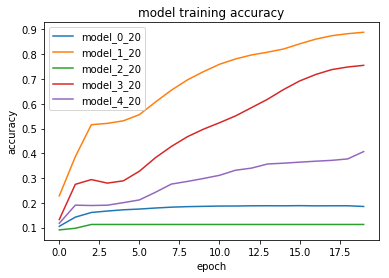

In [76]:
plt.plot(model_0_20.history["acc"])
plt.plot(model_1_20.history["acc"])
plt.plot(model_2_20.history["acc"])
plt.plot(model_3_20.history["acc"])
plt.plot(model_4_20.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['model_0_20', 'model_1_20', 'model_2_20', 'model_3_20', 'model_4_20'], loc = 'best')
plt.show()

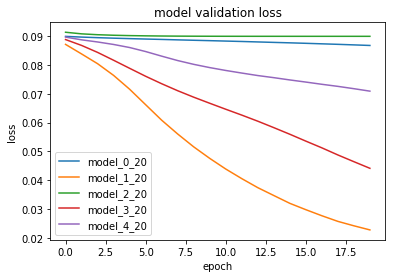

In [75]:
plt.plot(model_0_20.history["val_loss"])
plt.plot(model_1_20.history["val_loss"])
plt.plot(model_2_20.history["val_loss"])
plt.plot(model_3_20.history["val_loss"])
plt.plot(model_4_20.history["val_loss"])


plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['model_0_20', 'model_1_20', 'model_2_20', 'model_3_20','model_4_20'], loc = 'best')
plt.show()

### 結論：看起來model_1(增加神經元並且兩層神經元數量相同)的結果最好，model_3(第一層神經元個數>第二層)的次之，model_4(第一層神經元個數<第二層)再次之，model_2(增加layer數)最差。